# Project: Wrangling and Analyze Data

## Importing Libraries

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import tweepy
from tweepy import OAuthHandler
import json

## Data Gathering

In [3]:
#Collecting the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
df_1=pd.read_csv('twitter-archive-enhanced.csv')
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#Retreiving image predictions using requests.get
retv= requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [5]:
#Save the retrived data
with open('image-predictions.tsv', 'wb') as file:
    file.write(retv.content)

In [6]:
#Creating a dataframe for the saved data
#Remember content is separated with tabs so I added sep='\t' to take care of that
df_img=pd.read_csv('image-predictions.tsv',sep='\t')
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [58]:
'''
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 
consumer_secret = 
access_token = 
access_secret = 

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

My twitter developer account application was not approved so I downloaded the JSON file and read it to extract the needed features

In [7]:
# read the file in DataFrame
with open('tweetjson.txt', 'r') as f:
    tweet_json = pd.read_json(f, lines= True, encoding = 'utf-8')

# check the data
tweet_json.sample()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1272,2016-03-14 02:04:08+00:00,709198395643068416,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",False,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 709198376978522112, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2634,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [8]:
# check for the columns names 
tweet_json.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [9]:
# select the columns of interest : 'id', 'favorite_count','retweet_count'
tweet_json = tweet_json.loc[:,['id','favorite_count','retweet_count']]

'''
#rename id column
tweet_json=tweet_json.rename(columns={'id':'tweet_id'})
# check for the top 5 rows

'''
tweet_json.sample(5)

,id,favorite_count,retweet_count
1532,689993469801164801,1618,518
682,788412144018661376,16060,5990
1044,743545585370791937,3863,1066
2209,668614819948453888,654,341
1748,679001094530465792,3075,1378


## Assessing Data

In [10]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
df_1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1356,703425003149250560,7.030419e+17,4.196984e+09,2016-02-27 03:42:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Really guys? Again? I know this is a rare Alba...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703425003...,9,10,None,None,None,None,None
1652,683481228088049664,NaN,NaN,2016-01-03 02:53:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Banjo. He's a Peppercorn Shoop Da Whoop. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683481228...,11,10,Banjo,None,None,pupper,None
796,773247561583001600,NaN,NaN,2016-09-06 19:52:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. He's a pupholder. Comes with the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773247561...,10,10,Chip,None,None,None,None
2100,670704688707301377,NaN,NaN,2015-11-28 20:43:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Danny. He's too good to look at the road ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670704688...,6,10,Danny,None,None,None,None
174,858107933456039936,NaN,NaN,2017-04-28 23:57:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. He had an interview earlier tod...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858107933...,12,10,Wyatt,None,None,None,None


In [12]:
# Check information regarding the data
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
#Check for number of null values in each column
df_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

#### Observation
Columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp has over
2175 missing values.

In [14]:
# Check the unique dog names in the name column
df_1['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [15]:
# check for those written as lowercase
lowers =df_1.name.loc[df_1.name.str.islower()].unique()
lowers

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [16]:
# Check dog names less than 3 letters
df_1['name'][df_1['name'].apply(len) <= 3].tail(10)

2335     an
2345    the
2346    the
2347      a
2348      a
2349     an
2350      a
2352      a
2353      a
2354      a
Name: name, dtype: object

Some names such as 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad' start with lower case and are not dog nams

In [17]:
# Count of dog names labelled 'None'
df_1.query('name == "None"').count()
#df_1[df_1['name']=='None']

tweet_id                      745
in_reply_to_status_id          77
in_reply_to_user_id            77
timestamp                     745
source                        745
text                          745
retweeted_status_id            65
retweeted_status_user_id       65
retweeted_status_timestamp     65
expanded_urls                 686
rating_numerator              745
rating_denominator            745
name                          745
doggo                         745
floofer                       745
pupper                        745
puppo                         745
dtype: int64

#### Observation
There are 745 dog names labelled as 'None'

In [18]:
# Check for enteries whose rating numerator was wrongly extracted
pd.set_option('display.max_colwidth',None)
df_1[df_1.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator','rating_denominator']]

C:\Users\w10014629\AppData\Local\Temp\ipykernel_6968\721437282.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_1[df_1.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator','rating_denominator']]


,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [19]:
# Check unique denominator rating
df_1.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [20]:
# Check numerator rating = 0
df_1[df_1['rating_numerator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


#### Observation
##### Possible outliers (need to investigated)
- row 315 has rating 0/10.
- row 1016 has rating 0/10.

In [21]:
# Check denominator rating = 0
df_1[df_1['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


#### Observation
##### Need to investigated and dropped if needed
- row 313 has rating 960/0.

In [22]:
# check for rating denominator values < 10
pd.set_option('display.max_colwidth',None)
#df_1_clean.query('rating_denominator < 10')['text']
df_1.loc[df_1.rating_denominator < 10 ,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2


#### Observation
- row 313 has rating 960/0 instead of 13/10 which appears in the text column.
- 516 has no rating.
- row 2335 has rating 1/2 instead of 9/10 which appears in the text column.

In [23]:
# check for rating denominator values > 10
pd.set_option('display.max_colwidth',None)
#df_1_clean.query('rating_denominator > 10')['text']
df_1.loc[df_1.rating_denominator > 10 ,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80


#### Observation
##### Need to be corrected
- row 342 has no rating.
- row 1068 has rating 9/11 instead of 14/10 which appears in the text column.
- row 1012 has rating 50/50 instead of 11/10 which appears in the text column.
- row 1165 has rating 4/20 instead of 13/10 which appears in the text column.
- row 1662 has rating 7/11 instead of 10/10 which appears in the text column.
- row 1663 has no rating.

In [24]:
# Sample of the image data
df_img.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1750,823939628516474880,https://pbs.twimg.com/media/C284uD8WgAEmMVn.jpg,1,schipperke,0.234076,True,curly-coated_retriever,0.193093,True,Labrador_retriever,0.095197,True
535,676942428000112642,https://pbs.twimg.com/media/CWT7imQXIAMwpQ2.jpg,1,black-footed_ferret,0.707199,False,polecat,0.154630,False,weasel,0.097626,False
701,684880619965411328,https://pbs.twimg.com/media/CYEvSaRWwAAukZ_.jpg,1,clog,0.081101,False,spindle,0.066957,False,agama,0.060884,False
431,674271431610523648,https://pbs.twimg.com/media/CVt-SeMWwAAs9HH.jpg,1,German_shepherd,0.991454,True,malinois,0.004150,True,bloodhound,0.003019,True
518,676470639084101634,https://pbs.twimg.com/media/CWNOdIpWoAAWid2.jpg,1,golden_retriever,0.790386,True,borzoi,0.022885,True,dingo,0.015343,False
655,682242692827447297,https://pbs.twimg.com/media/CXfQG_fW8AAjVhV.jpg,1,snorkel,0.504983,False,loggerhead,0.345298,False,scuba_diver,0.074754,False
1708,817827839487737858,https://pbs.twimg.com/ext_tw_video_thumb/817827663108771841/pu/img/e9oi839RGWJR37jF.jpg,1,cocker_spaniel,0.387608,True,golden_retriever,0.264844,True,Pekinese,0.122123,True
1441,775085132600442880,https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg,1,chow,0.316565,True,golden_retriever,0.241929,True,Pomeranian,0.157524,True
1416,771136648247640064,https://pbs.twimg.com/media/CrOgsIBWYAA8Dtb.jpg,1,bathtub,0.368660,False,golden_retriever,0.297402,True,tub,0.201711,False
1922,856543823941562368,https://pbs.twimg.com/media/C-MOEDCXYAEjp7o.jpg,1,Boston_bull,0.306910,True,Siamese_cat,0.191218,False,Chihuahua,0.189288,True


In [25]:
# Check how many images are not dogs
df_img.query('p3_dog == False').count()

tweet_id    576
jpg_url     576
img_num     576
p1          576
p1_conf     576
p1_dog      576
p2          576
p2_conf     576
p2_dog      576
p3          576
p3_conf     576
p3_dog      576
dtype: int64

#### Observation
- `df_img` table- p1,p2,p2 column name I believe is dog breed need to be renamed

In [26]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
# Statistical description of the image data
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


 #### Observation
 - tweet_id datatype should be changed to string

In [28]:
# view json file
tweet_json

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [29]:
tweet_json.sample(5)

,id,favorite_count,retweet_count
1189,717841801130979328,2660,670
721,783085703974514689,9112,2565
318,834477809192075265,0,12224
732,781308096455073793,7973,2961
2269,667495797102141441,565,294


In [30]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### Observation
- change id to tweet_id and change datatype to object

In [31]:
#Statistical description of the JSON file
tweet_json.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


### Quality issues

##### `df_1` table
- 2278 missing values in in_reply_to_status_id, in_reply_to_user_id column
- 2175 missing values in retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp
- Remove non-empty row from the column above to avoid double counting since retweets are essentially duplicates of the actual tweets
- 59 missing values in expanded_urls.
- some names such as 'a', 'an','the','not','such','None' etc which starts with lowercases are not dog names.
- timestamp and retweeted_status_timestamp has datatype object instead of date_timestamp.
- rating_numerator is stored as int instead of float.
- indices 313,1068,1012,1165,1662,2335, 45,340,695,763,1689,1712 were incorrectly extracted
- indices 516, 342 and 1663 has no rating (drop)
- tweet_id is stored as int instead of float.
- name column can renamed as dog_name
- dog_rating column can be created and normalized out of 10 using rating_numerator and rating_denominator columns in df_1 dataset and dropping rating_numerator and rating_denominator columns after.


##### `df_img` table
- lowercase name of dog breed in p1, p2 and p3 (Consistent with uppercase names).
- p1,p2,p3 column name I believe is dog breed need to be renamed.
- tweet_id datatype is saved as int instead of object datatype.
- some of the images are not for dogs.
- Attributes p1,p2,p3, p1_conf, p2_conf, p3_conf can be divided into two separate columns with p1,p2,p3 column represented by dog_breed and p1_conf, p2_conf, p3_conf represented by predicted confidence

##### `tweet_json`  table
- id datatype is saved as int instead of object datatype.
- id column rename to tweet_id for consistency.


### Tidiness issues


##### `df_1` table
- Columns doggo,floofer,pupper,puppo can be categorized in to one column.
- doggo, floofer, pupper, puppo column has none values which I think should be Null/NaN.

##### `df_1`, `df_img` , `tweet_json`  table
- All three dataset can be merged into one master dataset


## Cleaning Data

In [32]:
# Make copies of original pieces of data
df_1_clean = df_1.copy()
df_img_clean = df_img.copy()
tweet_json_clean = tweet_json.copy()

### Quality 1

#### Define:
- Remove non-empty row from the column below to avoid double counting since retweets are essentially duplicates of the actual tweets.
- Drop the following columns which has over 2100 NaNs in the dataset.
   - in_reply_to_status_id
   - in_reply_to_user_id
   - retweeted_status_id
   - retweeted_status_user_id
   - retweeted_status_timestamp 

#### Code

In [33]:
# Dropping the unnecessary (non empty) rows

df_1_clean = df_1_clean[df_1_clean['retweeted_status_user_id'].isnull()]
df_1_clean = df_1_clean[df_1_clean['retweeted_status_timestamp'].isnull()]
df_1_clean = df_1_clean[df_1_clean['retweeted_status_user_id'].isnull()]

In [34]:
#dropping columns irrelevant to our dataframe and analysis
#df_1_clean=df_1_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)
df_1_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace = True)

#### Test

In [35]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


In [36]:
# Verifying the changes made above 

print(len(df_1)-len(df_1_clean))
df_1_clean.head(0)

181


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality 2

#### Define
- drop names such as 'a', 'an','the','not','such' etc which starts with lowercases are not dog names.

#### Code

In [37]:
# Use a regular expression to find name entries that are uppercase
df_1_clean['name'] = df_1_clean.name.str.extract('\\b([A-Z]\\S*)\\b')

#### Test

In [38]:
df_1_clean.name.sample()

1291    Cooper
Name: name, dtype: object

In [39]:
df_1_clean['name'].value_counts().nlargest()

None       680
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Name: name, dtype: int64

### Quality 3

#### Define
- Change timestamp datatype from object to date_timestamp

#### Code

In [40]:
#changing the datatype of the timestamp
df_1_clean['timestamp'] = pd.to_datetime(df_1_clean['timestamp'])

In [41]:
df_1_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1810,676821958043033607,2015-12-15 17:51:44+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Finally some constructive political change in this country. 11/10 https://t.co/mvQaETHVSb,"https://twitter.com/dog_rates/status/676821958043033607/photo/1,https://twitter.com/dog_rates/status/676821958043033607/photo/1",11,10,None,None,None,None,None


#### Test

In [42]:
df_1_clean.timestamp.info()

<class 'pandas.core.series.Series'>
Int64Index: 2175 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2175 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 34.0 KB


### Quality 4

#### Define

- Convert rating_numerator datatype to float from int.

#### Code

In [43]:
#convert rating_numerator datatype to float
df_1_clean.rating_numerator=df_1_clean.rating_numerator.astype('float')

#### Test

In [44]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   float64            
 6   rating_denominator  2175 non-null   int64              
 7   name                2071 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

### Quality 5

#### Define

#### Found and updated the following rows with incorrect denominator and numerator ratings
- index 313 has rating 960/0 instead of 13/10 .
- index 1068 has rating 9/11 instead of 14/10 .
- index 1202 has rating 50/50 instead of 11/10.
- index 1165 has rating 4/20 instead of 13/10.
- index 1662 has rating 7/11 instead of 10/10.
- index 2335 has rating 1/2 instead of 9/10.

- index 45 has rating 5/10 instead of 13.5/10
- index 340 has rating 75/10 instead of 9.75/10
- index 695 has rating 75/10 instead of 9.75/10
- index 763 has rating 27/10 instead of 11.27/10
- index 1689 has rating 5/10 instead of 9.5/10
- index 1712 has rating 26/10 instead of 11.26/10

#### Code

In [45]:
#list indices that need to be corrected
ind=[313,1012,1068,1165,1662,2335, 45,340,695,763,1689,1712]
vals=[13,11,14,13,10,9,13.5,9.75,9.75,11.27,9.5,11.26]
for i,val in zip(ind,vals):
    df_1_clean.loc[i,'rating_numerator'] = val
    df_1_clean.loc[i,'rating_denominator'] = 10

#### Test

In [46]:
# test for value for one of the entries
assert df_1_clean.loc[313,'rating_numerator'] ==13

In [47]:
 df_1_clean.loc[[313]]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,8.352464e+17,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,13.0,10.0,None,None,None,None,None


### Quality 6

#### Define
 
- Drop indices 516, 342, 1663 which has no rating.

#### Code

In [48]:
# drop index 516, 342, 1663 
df_1_clean.drop(index=[516, 342, 1663], axis=1, inplace=True )

#### Test 

In [49]:
# test for dropping index 516, 342, 1663
assert 1663 not in list(df_1_clean.index)

In [50]:
 #df_1_clean.loc[516]

### Quality 8

#### Define

- Change tweet_id datatype from int to object

#### Code

In [51]:
#Change tweet_id datatype to object.
df_1_clean['tweet_id']=df_1_clean['tweet_id'].astype('object')

#### Test

In [52]:
df_1_clean['tweet_id'].dtype

dtype('O')

In [53]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 340
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2172 non-null   object             
 1   timestamp           2172 non-null   datetime64[ns, UTC]
 2   source              2172 non-null   object             
 3   text                2172 non-null   object             
 4   expanded_urls       2116 non-null   object             
 5   rating_numerator    2174 non-null   float64            
 6   rating_denominator  2174 non-null   float64            
 7   name                2068 non-null   object             
 8   doggo               2172 non-null   object             
 9   floofer             2172 non-null   object             
 10  pupper              2172 non-null   object             
 11  puppo               2172 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(

In [54]:
assert df_1_clean.tweet_id.dtypes == 'object'

### Quality 7

#### Define

- Rename id column in `tweet_json` as tweet_id for consistency
- Change tweet_id datatype from int to object

#### Code

In [55]:
#rename id column
tweet_json_clean=tweet_json_clean.rename(columns={'id':'tweet_id'})
# Change tweet_id datatype to object
tweet_json_clean.tweet_id=tweet_json_clean.tweet_id.astype('object')



#### Test

In [56]:
assert tweet_json_clean.tweet_id.dtypes == 'object'

In [57]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [58]:
tweet_json_clean

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


### Quality 9

#### Define

- write a function extract the dog_breed and predicted confidence from p1,p2 and p3 
- assign a new column name dog_breed and predicted confidence
- drop needed columns p1,p1_conf,p1_dog	,p2,p2_conf	,p2_dog	,p3	,p3_conf,	p3_dog

#### Code

In [59]:
#function to extract the dog_breed and predicted confidence from p1,p2 and p3
predicted_breed = []
predicted_confidence = []

# define the function
def dog_breed_confidence(data):
    if data.p1_dog:
        predicted_breed.append(data.p1)
        predicted_confidence.append(data.p1_conf)
    elif data.p2_dog:
        predicted_breed.append(data.p2)
        predicted_confidence.append(data.p2_conf)
    elif data.p3_dog :
        predicted_breed.append(data.p3)
        predicted_confidence.append(data.p3_conf)
    else:
        predicted_breed.append('No breed')
        predicted_confidence.append(0)
# apply the function for each row        
df_img_clean.apply(dog_breed_confidence,axis =1)
# assign the new column names
df_img_clean['dog_breed'] = predicted_breed
df_img_clean['predicted_confidence'] = predicted_confidence

In [60]:
# drop columns ('p1', 'p1_dog', 'p1_conf' , 'p2', 'p2_dog','p2_conf' , 'p3', 'p3_dog', 'p3_conf')
df_img_clean.drop(columns = ['p1', 'p1_dog', 'p1_conf' , 'p2', 'p2_dog',
                                 'p2_conf' , 'p3', 'p3_dog', 'p3_conf'],axis=1, inplace =True)

#### Test

In [61]:
df_img_clean.head(5)

,tweet_id,jpg_url,img_num,dog_breed,predicted_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


### Quality 10

#### Define

- name column can renamed as dog_name
- drop dog name labelled NaN

#### Code

In [62]:
# Renaming name column
df_1_clean=df_1_clean.rename(columns={'name':'dog_name'})


In [63]:
df_1_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336192.0,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None
1,892177421306343424.0,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864.0,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None
3,891689557279858688.0,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None
4,891327558926688256.0,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,None


In [64]:
# replacing dog names labelled None with NaN and dropping them
df_1_clean['dog_name'] = df_1_clean['dog_name'].replace('None', np.nan)
df_1_clean['dog_name'].dropna()

0          Phineas
1            Tilly
2           Archie
3            Darla
4         Franklin
           ...    
2315    Christoper
2317       Jimothy
2318      Kreggory
2319         Scout
2325        Walter
Name: dog_name, Length: 1390, dtype: object

#### Test

In [65]:
df_1_clean[df_1_clean['dog_name']=='None'].count()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
dog_name              0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

In [66]:
df_1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_name', 'doggo',
       'floofer', 'pupper', 'puppo'],
      dtype='object')

### Quality 11

#### Define

- Create a dog_rating column 
- Normalized the dog_rating column out of 10 using rating_numerator and rating_denominator columns in df_1 dataset by dividing the rating_numerator / rating_denominator and then mulitiply by 10.
- drop rating_numerator and rating_denominator columns .

#### Code

In [67]:
# divide the rating_numerator / rating_denominator and then mulitiply by 10 & make dog_score column
df_1_clean['dog_rating']=(df_1_clean.rating_numerator /df_1_clean.rating_denominator)*10


In [68]:
# drop rating_numerator and rating_denominator columns
df_1_clean=df_1_clean.drop(columns=['rating_numerator' , 'rating_denominator'])

#### Test

In [69]:
df_1_clean.dog_rating.sample(5)

489     11.0
1099    11.0
1697    11.0
1322    11.0
923     12.0
Name: dog_rating, dtype: float64

In [70]:
df_1_clean.dog_rating.value_counts()

12.00      504
10.00      445
11.00      432
13.00      309
9.00       157
8.00        98
7.00        53
14.00       44
5.00        34
6.00        32
3.00        19
4.00        15
2.00        10
1.00         7
420.00       2
0.00         2
9.75         2
9.50         1
1776.00      1
11.27        1
13.50        1
666.00       1
17.00        1
15.00        1
182.00       1
11.26        1
Name: dog_rating, dtype: int64

In [71]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 340
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2172 non-null   object             
 1   timestamp      2172 non-null   datetime64[ns, UTC]
 2   source         2172 non-null   object             
 3   text           2172 non-null   object             
 4   expanded_urls  2116 non-null   object             
 5   dog_name       1390 non-null   object             
 6   doggo          2172 non-null   object             
 7   floofer        2172 non-null   object             
 8   pupper         2172 non-null   object             
 9   puppo          2172 non-null   object             
 10  dog_rating     2174 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(9)
memory usage: 203.8+ KB


### Quality 12

#### Define

- Change tweet_id datatype in `df_img` from int to object datatype.

#### Code

In [72]:
#Change tweet_id datatype object.
df_img_clean['tweet_id']=df_img_clean['tweet_id'].astype('object')

#### Test

In [73]:
df_img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              2075 non-null   object 
 1   jpg_url               2075 non-null   object 
 2   img_num               2075 non-null   int64  
 3   dog_breed             2075 non-null   object 
 4   predicted_confidence  2075 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.2+ KB


In [74]:
assert df_img_clean.tweet_id.dtypes == 'object'

### Tidiness 1

#### Define
- Replace all None object datatype in doggo, floofer, pupper, puppo column with NaN
- Create a dog_cycle column for  doggo, floofer, pupper, puppo column which has some none values and replace it with Null/NaN. This column will be labelled dog_stage.
- Convert dog_stage column datatype to a categorical datatype.
- Drop columns doggo, floofer, pupper, puppo.

#### Code

In [75]:
import numpy as np
#label the dog stage as dog_type
dog_type=['doggo', 'floofer', 'pupper', 'puppo']


#replacing all None strings in doggo, floofer, pupper, puppo column with NaN
df_1_clean[dog_type]=df_1_clean[dog_type].replace('None', np.nan)

In [76]:
#Create a dog_stage column for  doggo, floofer, pupper, puppo column
df_1_clean['dog_stage']=df_1_clean[dog_type].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

In [77]:
#replace empty string with np.nan and change datatype to category
df_1_clean.dog_stage = df_1_clean.dog_stage.replace('',np.nan).astype('category')

In [78]:
df_1_clean.dog_stage.unique()

[NaN, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo', 'doggo,floofer', 'doggo,pupper']
Categories (7, object): ['doggo', 'doggo,floofer', 'doggo,pupper', 'doggo,puppo', 'floofer', 'pupper', 'puppo']

In [79]:
# Dropping columns doggo, floofer, pupper, puppo
df_1_clean=df_1_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'],axis=1)

#### Test

In [80]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 340
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2172 non-null   object             
 1   timestamp      2172 non-null   datetime64[ns, UTC]
 2   source         2172 non-null   object             
 3   text           2172 non-null   object             
 4   expanded_urls  2116 non-null   object             
 5   dog_name       1390 non-null   object             
 6   dog_rating     2174 non-null   float64            
 7   dog_stage      344 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 138.3+ KB


### Tidiness 2

#### Define

- Merge df_1_clean and tweet_json_clean dataset on tweet_id column (left join) using pd.merge function.
- Name the merged dataset as df_1_clean
- Now df_1_clean and df_img_clean on tweet_id column (inner join) using pd.merge function.
- Name the new merged dataset as the twitter_archive_master

#### Code

In [81]:
# use the pd.merge function to merge df_1_clean dataset and tweet_json_clean dataset on tweet_id column (left join)
df_1_clean = pd.merge(df_1_clean, tweet_json_clean , how = 'left' , on = 'tweet_id')

# use the merge function to merge `df_1_clean` and `df_img_clean` on tweet_id column (inner join) 
# and make master dataset
master_dataset = pd.merge(df_1_clean, df_img_clean , how = 'inner' , on = 'tweet_id')

#### Test

In [82]:
master_dataset.sample(1)

,tweet_id,timestamp,source,text,expanded_urls,dog_name,dog_rating,dog_stage,favorite_count,retweet_count,jpg_url,img_num,dog_breed,predicted_confidence
221,811627233043480576.0,2016-12-21 17:39:46+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Augie. He's a savage. Doesn't give a h*ck about your garden. Still 10/10 would forgive then pet https://t.co/IU8S0n4oxn,https://twitter.com/dog_rates/status/811627233043480576/photo/1,Augie,10.0,NaN,14265.0,3650.0,https://pbs.twimg.com/media/C0N6opSXAAAkCtN.jpg,1,beagle,0.39628


In [83]:
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1298
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              1299 non-null   object             
 1   timestamp             1299 non-null   datetime64[ns, UTC]
 2   source                1299 non-null   object             
 3   text                  1299 non-null   object             
 4   expanded_urls         1299 non-null   object             
 5   dog_name              861 non-null    object             
 6   dog_rating            1299 non-null   float64            
 7   dog_stage             204 non-null    category           
 8   favorite_count        1299 non-null   float64            
 9   retweet_count         1299 non-null   float64            
 10  jpg_url               1299 non-null   object             
 11  img_num               1299 non-null   int64              
 12  dog_br

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [84]:
#Saving master_dataset as'twitter_archive_master.csv' file
master_dataset.to_csv('twitter_archive_master.csv',encoding='utf-8',index=False)

In [85]:
master_dataset

,tweet_id,timestamp,source,text,expanded_urls,dog_name,dog_rating,dog_stage,favorite_count,retweet_count,jpg_url,img_num,dog_breed,predicted_confidence
0,891815181378084864.0,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12.0,NaN,25461.0,4328.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
1,891689557279858688.0,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13.0,NaN,42908.0,8964.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086
2,891327558926688256.0,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,12.0,NaN,41048.0,9774.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
3,891087950875897856.0,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,NaN,13.0,NaN,20562.0,3261.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595
4,890729181411237888.0,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",NaN,13.0,NaN,56848.0,16716.0,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,666058600524156928.0,2015-11-16 01:01:59+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,https://twitter.com/dog_rates/status/666058600524156928/photo/1,NaN,8.0,NaN,115.0,61.0,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493
1295,666057090499244032.0,2015-11-16 00:55:59+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,https://twitter.com/dog_rates/status/666057090499244032/photo/1,NaN,9.0,NaN,304.0,146.0,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,golden_retriever,0.007959
1296,666051853826850816.0,2015-11-16 00:35:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,https://twitter.com/dog_rates/status/666051853826850816/photo/1,NaN,2.0,NaN,1253.0,879.0,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,No breed,0.000000
1297,666044226329800704.0,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"

## Analyzing and Visualizing Data

In [86]:
#Statistical description of the master dataset
master_dataset.describe()

,dog_rating,favorite_count,retweet_count,img_num,predicted_confidence
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,12.172841,8358.274827,2581.046189,1.187067,0.460730
std,50.322282,11176.670627,3999.477910,0.540746,0.337966
min,1.000000,81.000000,16.000000,1.000000,0.000000
25%,10.000000,1762.000000,603.500000,1.000000,0.140538
50%,11.000000,3904.000000,1309.000000,1.000000,0.456092
75%,12.000000,10469.000000,3107.500000,1.000000,0.767629
max,1776.000000,107015.000000,56625.000000,4.000000,0.999956


### Insight 1:
- Which dog name is the most common name?


In [87]:
# Find the total occurrences of each dog name in the cleaned combined_archive dataframe
master_dataset.dog_name.value_counts()

Oliver       8
Tucker       7
Winston      7
Penny        6
Cooper       6
            ..
Theo         1
Albert       1
Bonaparte    1
Sephie       1
Walter       1
Name: dog_name, Length: 651, dtype: int64

### Visualization

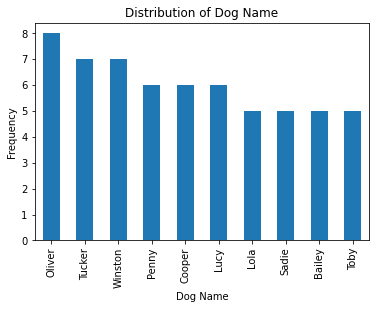

In [88]:
#lot the top 10 Dog names by frequency
import matplotlib.pyplot as plt

g=master_dataset.dog_name.value_counts().nlargest(10).plot(kind='bar')
plt.title("Distribution of Dog Name")
plt.xlabel('Dog Name')
plt.ylabel('Frequency');
# Exporting the figure
fig =g.get_figure()
fig.savefig('populardogname.png')

Oliver happens to be the most common dog. 

### Image of a dog named Oliver

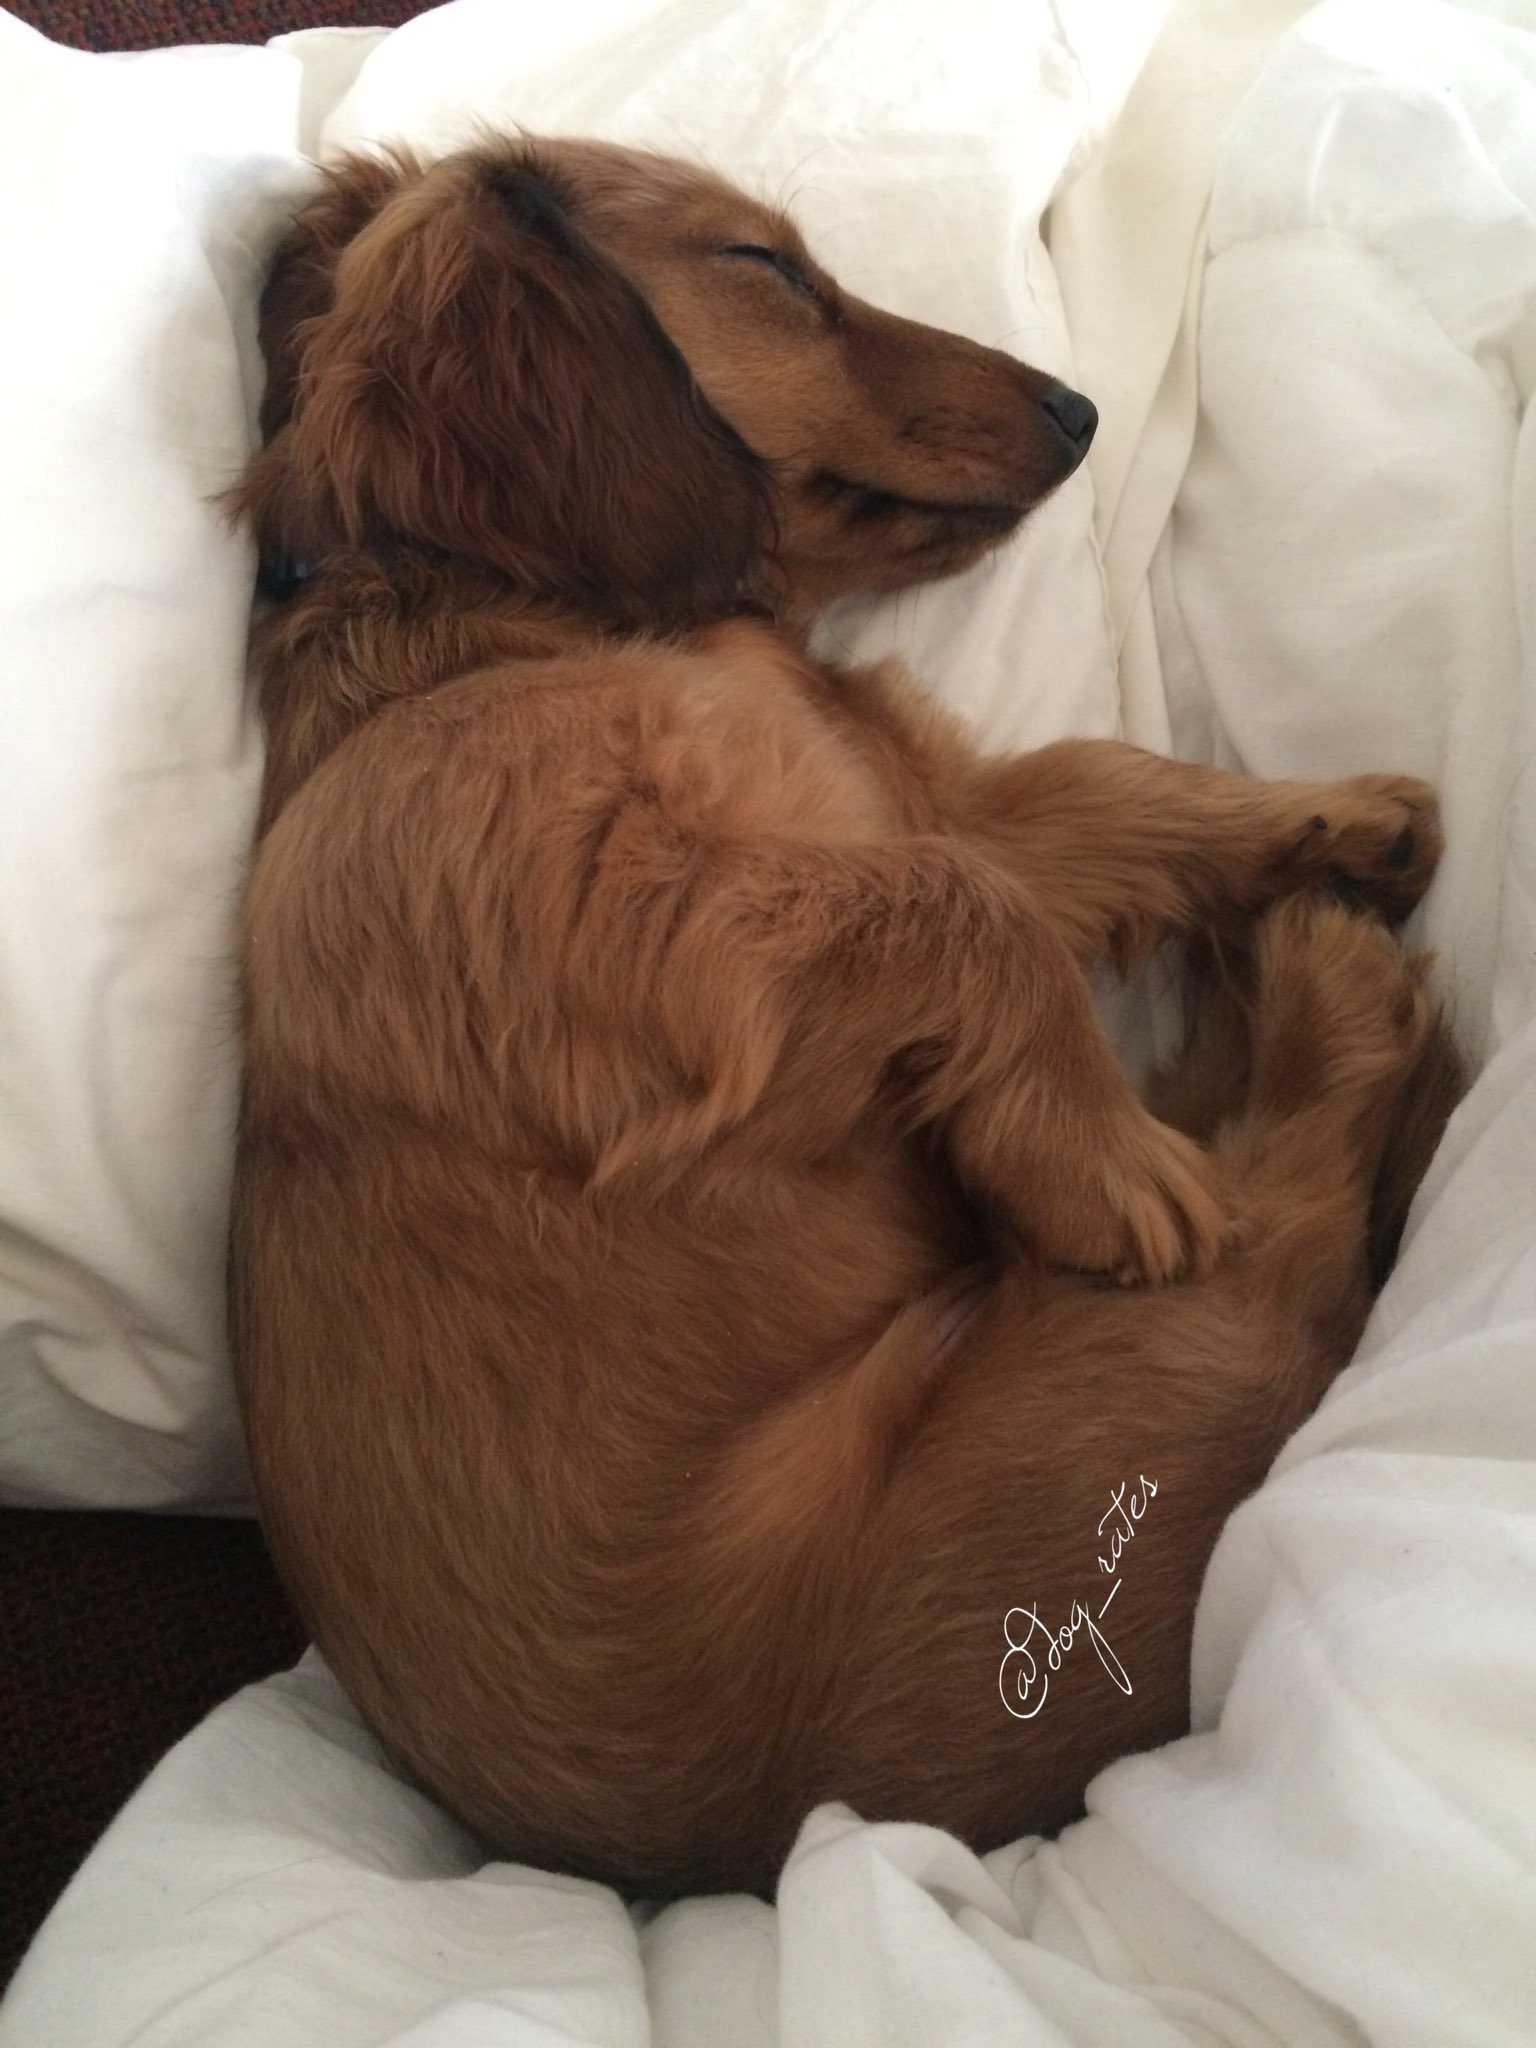

### Insight 2:

- Which dog breed is the most common breed?


### Visualization

In [89]:
# Count of dog breed
master_dataset.dog_breed.value_counts()

No breed                   200
golden_retriever           108
Pembroke                    71
Labrador_retriever          68
Chihuahua                   55
                          ... 
Japanese_spaniel             1
silky_terrier                1
Welsh_springer_spaniel       1
bluetick                     1
black-and-tan_coonhound      1
Name: dog_breed, Length: 109, dtype: int64

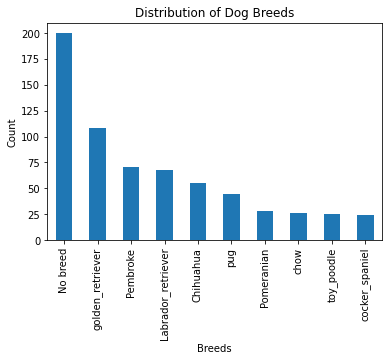

In [90]:
# frequency for dog breeds
g=master_dataset.dog_breed.value_counts().nlargest(10).plot(kind='bar')
plt.title('Distribution of Dog Breeds')
plt.xlabel('Breeds')
plt.ylabel('Count');
# Exporting the figure
fig =g.get_figure()
fig.savefig('populardogbreed.png')

It appears about 324 dogs have no breed which is unclear and need to be investigated further. Golden retriever breed happens to be the most common known breed of dogs in our dataset.

In [93]:
master_dataset[master_dataset['dog_breed']=='golden_retriever']

,tweet_id,timestamp,source,text,expanded_urls,dog_name,dog_rating,dog_stage,favorite_count,retweet_count,jpg_url,img_num,dog_breed,predicted_confidence
9,888917238123831296.0,2017-07-23 00:22:39+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jim. He found a fren. Taught him how to sit like the good boys. 12/10 for both https://t.co/chxruIOUJN,https://twitter.com/dog_rates/status/888917238123831296/photo/1,Jim,12.0,NaN,29611.0,4709.0,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719
25,883482846933004288.0,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",Bella,13.5,NaN,46860.0,10407.0,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082
26,883117836046086144.0,2017-07-07 00:17:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat https://t.co/Se5fZ9wp5E","https://twitter.com/dog_rates/status/883117836046086144/photo/1,https://twitter.com/dog_rates/status/883117836046086144/photo/1",NaN,13.0,NaN,37914.0,6949.0,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,2,golden_retriever,0.949562
30,882268110199369728.0,2017-07-04 16:01:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alfy. You're witnessing his first watermelon experience. I think it was a success. 13/10 happy 4th Alfy 🇺🇸 https://t.co/fYP5RlutfA,"https://twitter.com/dog_rates/status/882268110199369728/photo/1,https://twitter.com/dog_rates/status/882268110199369728/photo/1,https://twitter.com/dog_rates/status/882268110199369728/photo/1",Alfy,13.0,NaN,45880.0,12118.0,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,1,golden_retriever,0.762211
34,880465832366813184.0,2017-06-29 16:39:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bella. She had her first beach experience this morning. Complete success. 12/10 would perform a sandy boop https://t.co/4VsFysDmiw,"https://twitter.com/dog_rates/status/880465832366813184/photo/1,https://twitter.com/dog_rates/status/880465832366813184/photo/1,https://twitter.com/dog_rates/status/880465832366813184/photo/1,https://twitter.com/dog_rates/status/880465832366813184/photo/1",Bella,12.0,NaN,29075.0,6546.0,https://pbs.twimg.com/media/DDgK-J4XUAIEV9W.jpg,1,golden_retriever,0.913255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,667530908589760512.0,2015-11-20 02:32:25+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","Meet Naphaniel. He doesn't necessarily enjoy his day job, but he's damn good at it. 10/10 https://t.co/xoRWyQTcmy",https://twitter.com/dog_rates/status/667530908589760512/photo/1,Naphaniel,10.0,NaN,501.0,264.0,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,1,golden_retriever,0.633037
1252,667211855547486208.0,2015-11-19 05:24:37+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Genevieve. She is a golden retriever cocktail mix. Comfortable close to wall. Shows no emotions. 9/10 https://t.co/azEoGqVonH,https://twitter.com/dog_rates/status/667211855547486208/photo/1,Genevieve,9.0,NaN,516.0,258.0,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,1,golden_retriever,0.462556
1263,667044094246576128.0,2015-11-18 18:17:59+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 gimme now https://t.co/QZAnwgnOMB,https://twitter.com/dog_rates/status/667044094246576128/photo/1,NaN,12.0,NaN,198.0,54.0

### Image of a Golden retriever

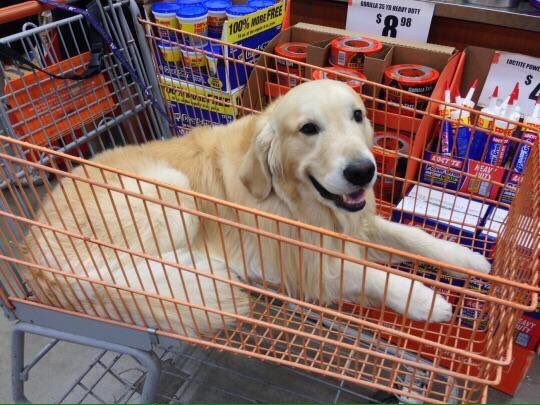

### Insight 3:
- What dog stage is the most common?

### Visualization

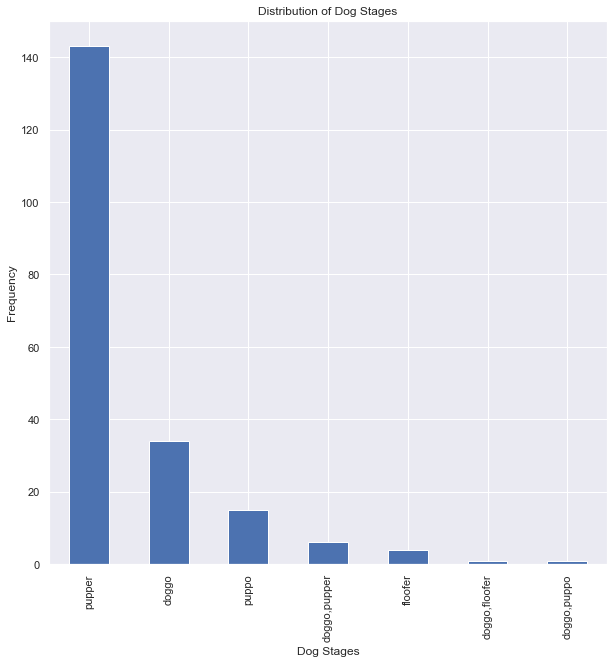

In [179]:
# frequency of dog_ stage
g=master_dataset.dog_stage.value_counts().plot(kind='bar')
plt.title("Distribution of Dog Stages")
plt.xlabel('Dog Stages')
plt.ylabel('Frequency');
# Exporting the figure
fig =g.get_figure()
fig.savefig('dogstage.png')

 From the visualization, it appear pupper is the most common dog stage in the cleaned dataset.

### Image of a Pupper dog

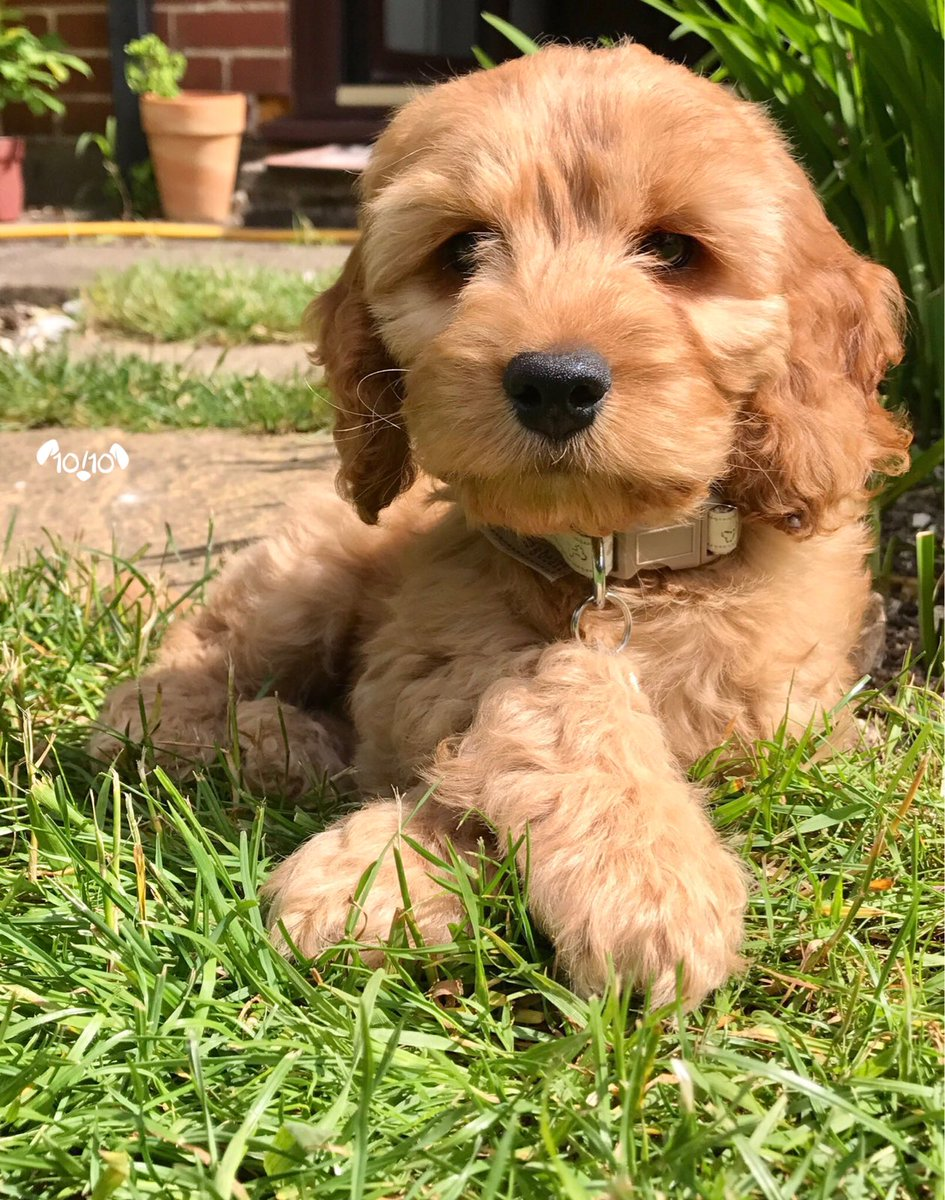

### Insight 4
- Which dog cycle has the most retweet count?

### Visualization

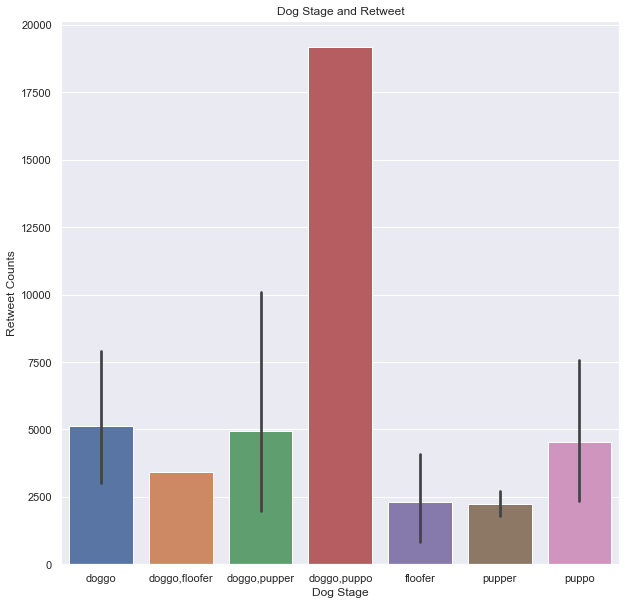

In [175]:
# Generating a graphical plot for the data
sns.set(rc={'figure.figsize':(10,10)})

# Setting up the graph layout and design
#sns.set_style("whitegrid")
g = sns.barplot(x="dog_stage", y="retweet_count", data=master_dataset)
g.set_ylabel('Retweet Counts')

# Setting the appropriate headers
plt.title('Dog Stage and Retweet')
plt.xlabel('Dog Stage')

# Exporting the figure
fig =g.get_figure()
fig.savefig('dogstage_and_retweets.png')

From the visualization Dog stage/cycle doggo,puppo happen to have the most retweet count and pupper records the lowest retweet count even though pupper is the most common dog stage.

### Insight 5
- Which dog cycle has the most rating?

### Visualization

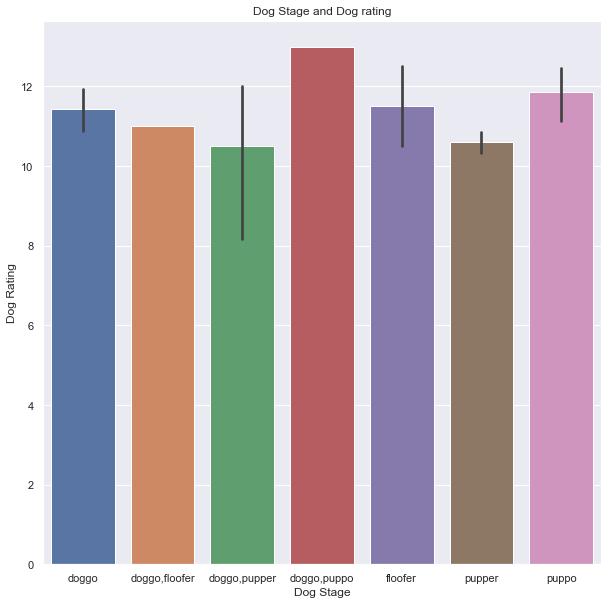

In [176]:
# Generating a graphical plot for the data
sns.set(rc={'figure.figsize':(10,10)})

g = sns.barplot(x="dog_stage", y="dog_rating", data=master_dataset)

# Setting the appropriate headers
plt.title('Dog Stage and Dog rating')
plt.xlabel('Dog Stage')
plt.ylabel('Dog Rating')
# Exporting the figure
fig =g.get_figure()
fig.savefig('dogstage_and_rating.png')

Doggo,puppo records the highest dog rating among the other dog stages and pupper records the lowest rating even though it is the most common dog stage

### Insight 6
- Which dog rating has the most retweet count?

### Visualization

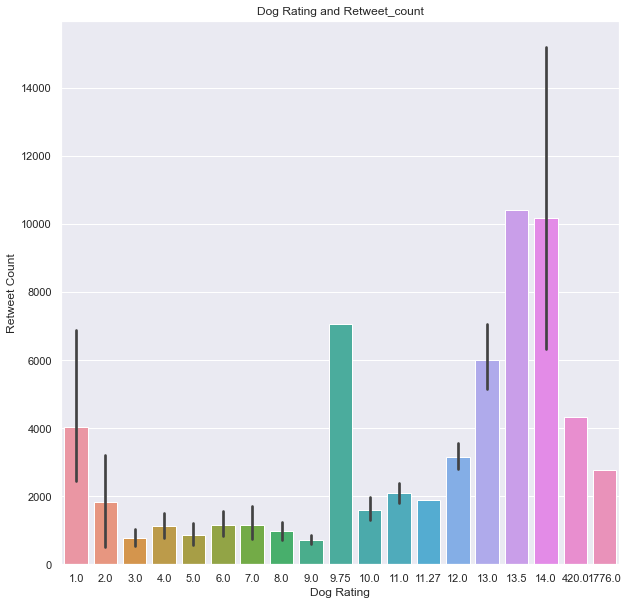

In [177]:

g=sns.barplot(x="dog_rating", y="retweet_count", data=master_dataset)
# Setting the appropriate headers
plt.title('Dog Rating and Retweet_count')
plt.xlabel('Dog Rating')
plt.ylabel('Retweet Count')
fig =g.get_figure()
fig.savefig('rating_and_retweet.png')

From observation rating of 13.5 records the highest retweet count.

### Insight 7
- Which dog rating has the most favorite count?

Text(0, 0.5, 'Favorite Count')

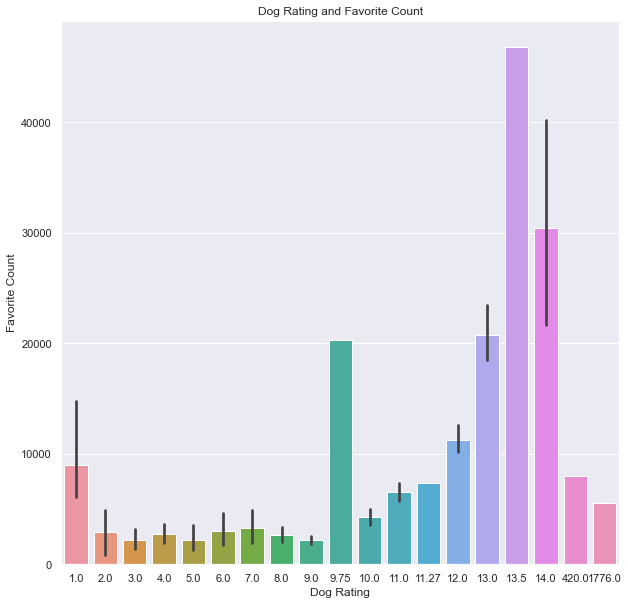

In [178]:
sns.barplot(x="dog_rating", y="favorite_count", data=master_dataset)
# Setting the appropriate headers
plt.title('Dog Rating and Favorite Count')
plt.xlabel('Dog Rating')
plt.ylabel('Favorite Count')

From observation rating of 13.5 records the highest favorite count.